In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
newdate = str(recentdate)
print(type(newdate))
newdate[2:-3]

<class 'str'>


'2017-08-23'

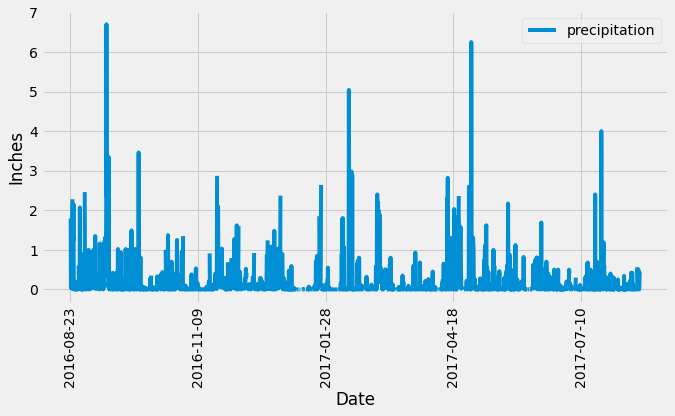

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
LatestDate = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
# Calculate the date one year from the last date in data set.
PrevYear   = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
Results    = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= PrevYear).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Df = pd.DataFrame(Results, columns=['date', 'precipitation'])
Df.set_index(Df['date'], inplace=True)

# Sort the dataframe by date
Df = Df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
Df.plot   (figsize = (10,5))
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stationscount = session.query(Station).count()
print(f"Station Count: {stationscount}")

Station Count: 9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

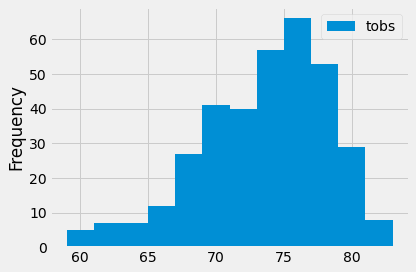

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= PrevYear).all()
# Convert To DataFrame
df = pd.DataFrame(Results, columns=['tobs'])
# Plot in 12 bins
df.plot.hist(bins=12)
plt.tight_layout()

# Close session

In [16]:
# Close Session
session.close()